### Assigning Sentiment Scores 

In [8]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the CSV file
input_csv_path = "players_with_busts2.csv"
output_csv_path2 = "draft_sentiment_scores_comb2.csv"

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def preprocess_text(text, remove_words=None):
    if isinstance(text, str):
        # Remove special characters, punctuation, and numbers
        text = re.sub(r'[^\w\s]|[\d]', '', text)
        
        # Convert text to lowercase
        text = text.lower()

        # Tokenize the text
        tokens = nltk.word_tokenize(text)
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stop_words]
        
        # Remove specific words if provided
        if remove_words:
            filtered_tokens = [word for word in filtered_tokens if word not in remove_words]
        
        # Join the tokens back into a single string
        processed_text = ' '.join(filtered_tokens)

        return processed_text
    else:
        return ""

# Read the CSV into a pandas DataFrame
df = pd.read_csv(input_csv_path)

# Preprocess "Strengths" and "Weaknesses" columns and combine them
df['Strengths_Weaknesses_Combined'] = df['Strengths'].fillna('') + ' ' + df['Weaknesses'].fillna('')
df['Strengths_Weaknesses_Combined_Preprocessed'] = df['Strengths_Weaknesses_Combined'].apply(preprocess_text)

# Define a function to calculate compound sentiment scores
def calculate_compound_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']

# Calculate compound sentiment scores for each row
df['Strengths_Weaknesses_Combined_Compound'] = df['Strengths_Weaknesses_Combined_Preprocessed'].apply(calculate_compound_sentiment)

# Save the DataFrame with sentiment scores to a new CSV
df.to_csv(output_csv_path2, index=False)


In [34]:
df_sorted = df.sort_values(by='Strengths_Weaknesses_Combined_Compound', ascending = True)
df_sorted.head(10)

,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,TEAM_NAME,...,Outlook_Preprocessed,Perf,DraftX,Bscore,Bust,Bust2,Bust3,Strengths_Weaknesses_Combined,Strengths_Weaknesses_Combined_Preprocessed,Strengths_Weaknesses_Combined_Compound
228,202689,Kemba Walker,2011,1,9,9,Draft,1610612766,Charlotte,Bobcats,...,NaN,62.024267,1.40,86.833973,N,N,N,"Walker’s game is marked by ""electricity"" and e...",walkers game marked electricity explosiveness ...,-0.7808
323,202326,DeMarcus Cousins,2010,1,5,5,Draft,1610612758,Sacramento,Kings,...,NaN,65.118282,1.20,78.141939,N,N,N,"An extremely strong player, his body is well d...",extremely strong player body well developed re...,-0.7241
1010,1631246,Vince Williams Jr,2022,2,17,47,Draft,1610612763,Memphis,Grizzlies,...,NaN,9.880000,3.30,32.604000,TBD,TBD,TBD,A talented and versatile wing defender who pro...,talented versatile wing defender produces stea...,-0.1103
1060,202327,Ekpe Udoh,2010,1,6,6,Draft,1610612744,Golden State,Warriors,...,NaN,23.119101,1.25,28.898876,N,Y,Y,"Skilled power forward with a long, lean frame....",skilled power forward long lean frame wingspan...,-0.0109
1298,2595,Remon Van de Hare,2003,2,23,52,Draft,1610612761,Toronto,Raptors,...,NaN,0.000000,3.55,0.000000,Y,Y,Y,,NaN,0.0000
292,2570,Kendrick Perkins,2003,1,27,27,Draft,1610612763,Memphis,Grizzlies,...,NaN,34.845051,2.30,80.143618,N,N,N,,NaN,0.0000
1273,2086,Scoonie Penn,2000,2,28,57,Draft,1610612737,Atlanta,Hawks,...,NaN,0.000000,3.80,0.000000,Y,Y,Y,,NaN,0.0000
1274,2087,Pete Mickeal,2000,2,29,58,Draft,1610612742,Dallas,Mavericks,...,NaN,0.000000,3.85,0.000000,Y,Y,Y,,NaN,0.0000
605,101123,Gerald Green,2005,1,18,18,Draft,1610612738,Boston,Celtics,...,NaN,31.199128,1.85,57.718387,N,N,MID,,NaN,0.0000
1275,2247,Michael Wright,2001,2,10,38,Draft,1610612752,New York,Knicks,...,NaN,0.000000,2.85,0.000000,Y,Y,Y,,NaN,0.0000


In [12]:
print(df.columns)

Index(['PERSON_ID', 'PLAYER_NAME', 'SEASON', 'ROUND_NUMBER', 'ROUND_PICK',
       'OVERALL_PICK', 'DRAFT_TYPE', 'TEAM_ID', 'TEAM_CITY', 'TEAM_NAME',
       'TEAM_ABBREVIATION', 'ORGANIZATION', 'ORGANIZATION_TYPE',
       'PLAYER_PROFILE_FLAG', 'First Name', 'Last Name', 'Suffix1', 'Suffix2',
       'Overall', 'NBA Comparison', 'Strengths', 'Weaknesses', 'Outlook',
       'Notes', 'OverTxt', 'Has_Page', 'PER', 'WS_48', 'VORP',
       'Strengths_Preprocessed', 'Weaknesses_Preprocessed',
       'Outlook_Preprocessed', 'Perf', 'DraftX', 'Bscore', 'Bust', 'Bust2',
       'Bust3', 'Strengths_Weaknesses_Combined',
       'Strengths_Weaknesses_Combined_Preprocessed',
       'Strengths_Weaknesses_Combined_Compound'],
      dtype='object')


In [23]:
import pandas as pd

# Load the CSV file
input_csv_path = "draft_sentiment_scores_comb2.csv"

# Read the CSV into a pandas DataFrame
df = pd.read_csv(input_csv_path)

# Get the top 5 most positive scores
top_positive_scores = df.nlargest(10, 'Strengths_Weaknesses_Combined_Compound')

# Get the top 5 most negative scores
top_negative_scores = df.nsmallest(10, 'Strengths_Weaknesses_Combined_Compound')

# Drop rows with NaN values in the specified columns
columns_to_check = ['Strengths_Weaknesses_Combined_Preprocessed', 'Strengths_Weaknesses_Combined_Compound']
top_positive_scores = top_positive_scores.dropna(subset=columns_to_check)
top_negative_scores = top_negative_scores.dropna(subset=columns_to_check)

# Print the top 5 most positive scores with PLAYER_NAME and Bust2 column values
print("Top 5 Most Positive Scores:")
print(top_positive_scores[['PLAYER_NAME', 'Bust2', 'Strengths_Weaknesses_Combined_Preprocessed','Strengths_Weaknesses_Combined_Compound']])

# Print the top 5 most negative scores with PLAYER_NAME and Bust2 column values
print("\nTop 5 Most Negative Scores:")
print(top_negative_scores[['PLAYER_NAME', 'Bust2','Strengths_Weaknesses_Combined_Preprocessed', 'Strengths_Weaknesses_Combined_Compound']])


Top 5 Most Positive Scores:
           PLAYER_NAME Bust2  \
245     Charles Bassey   TBD   
521      Deandre Ayton     N   
185       Cole Anthony   TBD   
469         RJ Barrett     N   
680    Emmanuel Mudiay     N   
740  Marvin Bagley III     Y   
133       Tyrese Maxey   TBD   
335        LaMelo Ball   TBD   
413  Wendell Carter Jr     N   
497    Cade Cunningham   TBD   

            Strengths_Weaknesses_Combined_Preprocessed  \
245  bigman long wingspan plays high level intensit...   
521  tremendous physical profile pounds fits profil...   
185  anthony aggressive confident scorefirst point ...   
469  lefty guard plays game lot determination energ...   
680  rare combination size speed agility athleticis...   
740  nbaready body positional versatility displays ...   
133  strengths speedy combo guard crafty scoring ab...   
335  physically gifted lead guard prospect plenty l...   
413  nbaready bodystrong frame carter pounds wingsp...   
497  prized lb lead guard prospect skil

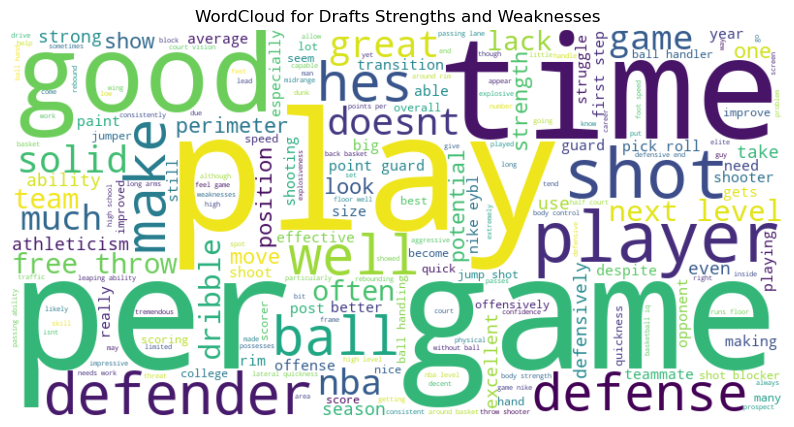

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine strengths and weaknesses text
combined_text = df['Strengths_Weaknesses_Combined_Preprocessed'].str.cat(sep=' ')

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Drafts Strengths and Weaknesses')
plt.show()


In [41]:
import pandas as pd

# Load the CSV file
input_csv_path = "draft_sentiment_scores_comb2.csv"

# Read the CSV into a pandas DataFrame
df = pd.read_csv(input_csv_path)

# Drop rows with NaN values in the specified columns
columns_to_check = ['Strengths_Weaknesses_Combined_Preprocessed', 'Strengths_Weaknesses_Combined_Compound']
df = df.dropna(subset=columns_to_check)

# Get the top 10 most positive scores
top_positive_scores = df.nlargest(10, 'Strengths_Weaknesses_Combined_Compound')

# Get the top 10 most negative scores
top_negative_scores = df.nsmallest(10, 'Strengths_Weaknesses_Combined_Compound')

# Print the top 10 most positive scores with PLAYER_NAME and Bust2 column values
print("Top 10 Most Positive Scores:")
print(top_positive_scores[['PLAYER_NAME', 'Bust2', 'Strengths_Weaknesses_Combined_Preprocessed','Strengths_Weaknesses_Combined_Compound']])

# Print the top 10 most negative scores with PLAYER_NAME and Bust2 column values
print("\nTop 10 Most Negative Scores:")
print(top_negative_scores[['PLAYER_NAME', 'Bust2','Strengths_Weaknesses_Combined_Preprocessed', 'Strengths_Weaknesses_Combined_Compound']])

# Filter out rows with NaN values in the compound scores
df_filtered = df.dropna(subset=['Strengths_Weaknesses_Combined_Compound'])

# Count the number of occurrences for each sentiment category
sentiment_counts = {
    'Positive': sum(df_filtered['Strengths_Weaknesses_Combined_Compound'] > 0.1),
    'Neutral': sum((df_filtered['Strengths_Weaknesses_Combined_Compound'] >= -0.1) & (df_filtered['Strengths_Weaknesses_Combined_Compound'] <= 0.1)),
    'Negative': sum(df_filtered['Strengths_Weaknesses_Combined_Compound'] < -0.1)
}

# Print the distribution of sentiment categories
print("\nSentiment Distribution:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count}")


Top 10 Most Positive Scores:
           PLAYER_NAME Bust2  \
245     Charles Bassey   TBD   
521      Deandre Ayton     N   
185       Cole Anthony   TBD   
469         RJ Barrett     N   
680    Emmanuel Mudiay     N   
740  Marvin Bagley III     Y   
133       Tyrese Maxey   TBD   
335        LaMelo Ball   TBD   
413  Wendell Carter Jr     N   
497    Cade Cunningham   TBD   

            Strengths_Weaknesses_Combined_Preprocessed  \
245  bigman long wingspan plays high level intensit...   
521  tremendous physical profile pounds fits profil...   
185  anthony aggressive confident scorefirst point ...   
469  lefty guard plays game lot determination energ...   
680  rare combination size speed agility athleticis...   
740  nbaready body positional versatility displays ...   
133  strengths speedy combo guard crafty scoring ab...   
335  physically gifted lead guard prospect plenty l...   
413  nbaready bodystrong frame carter pounds wingsp...   
497  prized lb lead guard prospect ski

In [50]:
sentiment = df.to_excel("draft_sentimet_clean.xlsx")

In [52]:
sentiment_df = pd.read_excel("draft_sentimet_clean.xlsx")

In [63]:
sentiment_df.tail()

,Unnamed: 0,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,...,Outlook_Preprocessed,Perf,DraftX,Bscore,Bust,Bust2,Bust3,Strengths_Weaknesses_Combined,Strengths_Weaknesses_Combined_Preprocessed,Strengths_Weaknesses_Combined_Compound
1042,1420,1628974,Tony Carr,2018,2,21,51,Draft,1610612740,New Orleans,...,NaN,0.0,3.50,0.0,Y,Y,Y,"In his sophomore season, Tony Carr blossomed i...",sophomore season tony carr blossomed firstteam...,0.9974
1043,1421,1628986,Jaylen Hands,2019,2,26,56,Draft,1610612746,LA,...,ucla freshman big piece talented recruiting cl...,0.0,3.75,0.0,Y,Y,Y,Flashy point with explosiveness and confidence...,flashy point explosiveness confidence capable ...,0.9984
1044,1422,1628992,Justin Jackson,2018,2,13,43,Draft,1610612743,Denver,...,NaN,0.0,3.10,0.0,Y,Y,Y,"Playing for a team like UNC, Jackson will come...",playing team like unc jackson come league ton ...,0.9994
1045,1423,1629068,Issuf Sanon,2018,2,14,44,Draft,1610612764,Washington,...,NaN,0.0,3.15,0.0,Y,Y,Y,Explossive combo guard who can change the rhyt...,explossive combo guard change rhythm game soli...,0.9981
1046,1424,1629079,Vanja Marinkovic,2019,2,30,60,Draft,1610612758,Sacramento,...,NaN,0.0,3.95,0.0,Y,Y,Y,Above average athlete with good size for his p...,average athlete good size position size helps ...,0.9312


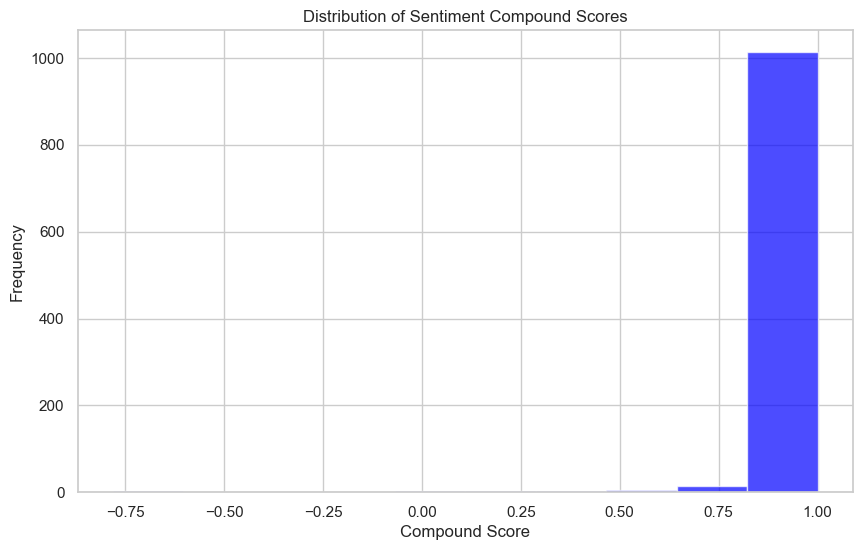

In [62]:
import matplotlib.pyplot as plt

# Filter out rows with NaN values in the compound scores
df_filtered = sentiment_df.dropna(subset=['Strengths_Weaknesses_Combined_Compound'])

# Create a histogram of the compound scores
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['Strengths_Weaknesses_Combined_Compound'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Compound Scores')
plt.grid(True)
plt.show()


### Performing Sentiment on Weaknesses only

In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the CSV file
input_csv_path = "players_with_busts2.csv"
output_csv_path3 = "draft_sentiment_scores_Weaknesses.csv"

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def preprocess_text(text, remove_words=None):
    if isinstance(text, str):
        # Remove special characters, punctuation, and numbers
        text = re.sub(r'[^\w\s]|[\d]', '', text)
        
        # Convert text to lowercase
        text = text.lower()

        # Tokenize the text
        tokens = nltk.word_tokenize(text)
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stop_words]
        
        # Remove specific words if provided
        if remove_words:
            filtered_tokens = [word for word in filtered_tokens if word not in remove_words]
        
        # Join the tokens back into a single string
        processed_text = ' '.join(filtered_tokens)

        return processed_text
    else:
        return ""

# Read the CSV into a pandas DataFrame
df = pd.read_csv(input_csv_path)


# Drop rows with NaN values in the specified columns
columns_to_check = ['Weaknesses']
df = df.dropna(subset=columns_to_check)

df['Weaknesses_Preprocessed'] = df['Weaknesses'].apply(preprocess_text)

# Define a function to calculate compound sentiment scores
def calculate_compound_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']

# Calculate compound sentiment scores for each row
df['Weaknesses_Compound'] = df['Weaknesses_Preprocessed'].apply(calculate_compound_sentiment)

# Save the DataFrame with sentiment scores to a new CSV
df.to_csv(output_csv_path3, index=False)


In [2]:
df.head()

,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,TEAM_NAME,...,Strengths_Preprocessed,Weaknesses_Preprocessed,Outlook_Preprocessed,Perf,DraftX,Bscore,Bust,Bust2,Bust3,Weaknesses_Compound
0,1630564,RaiQuan Gray,2021,2,29,59,Draft,1610612751,Brooklyn,Nets,...,unique player tremendous frame ability face ba...,lacks great length four wingspan solid elite b...,projected possible midsecond round pick 2021 n...,72.800000,3.90,283.920000,TBD,TBD,TBD,0.9648
1,203999,Nikola Jokic,2014,2,11,41,Draft,1610612743,Denver,Nuggets,...,high basketball iq greatest strength strong pe...,average athlete lacking great speed leaping ab...,NaN,75.744295,3.00,227.232886,N,N,N,0.6908
2,202738,Isaiah Thomas,2011,2,30,60,Draft,1610612758,Sacramento,Kings,...,crafty scorer find hole defense passing skill ...,small even point guard ability get inside larg...,NaN,51.704322,3.95,204.232071,N,N,N,-0.7783
3,201188,Marc Gasol,2007,2,18,48,Draft,1610612747,Los Angeles,Lakers,...,physically gasol great upper body strength lik...,unlike pau marc average athlete heavy legged p...,NaN,59.325567,3.35,198.740649,N,N,N,0.9677
8,200794,Paul Millsap,2006,2,17,47,Draft,1610612762,Utah,Jazz,...,tremendous rebounder give great effort every t...,listed closer far standard nba power forward s...,NaN,51.610197,3.30,170.313649,N,N,N,0.8901


In [3]:
df_sorted = df.sort_values(by='Weaknesses_Compound', ascending = True)
df_sorted.head(10)

,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,TEAM_NAME,...,Strengths_Preprocessed,Weaknesses_Preprocessed,Outlook_Preprocessed,Perf,DraftX,Bscore,Bust,Bust2,Bust3,Weaknesses_Compound
877,202378,Willie Warren,2010,2,24,54,Draft,1610612746,Los Angeles,Clippers,...,considered lottery type talent season warren b...,warren suffers poor shot selection asked numbe...,NaN,11.284211,3.65,41.187368,Y,Y,Y,-0.9869
240,201985,AJ Price,2009,2,22,52,Draft,1610612754,Indiana,Pacers,...,developed excellent longrange shooter price 27...,high level nba athlete quickness fine price do...,NaN,24.034843,3.55,85.323693,Y,N,N,-0.9823
482,201568,Danilo Gallinari,2008,1,6,6,Draft,1610612752,New York,Knicks,...,long crafty player knack scoring become consis...,high level european player always equal contri...,NaN,51.903291,1.25,64.879114,N,N,N,-0.9759
1059,203511,Grant Jerrett,2013,2,10,40,Draft,1610612757,Portland,Trail Blazers,...,great shooting ability player size good length...,jerrett failed prove mediocre player college l...,NaN,9.800000,2.95,28.910000,Y,Y,Y,-0.9677
228,202689,Kemba Walker,2011,1,9,9,Draft,1610612766,Charlotte,Bobcats,...,walker game marked electricity explosiveness p...,measurement shoes win remains undersized commo...,NaN,62.024267,1.40,86.833973,N,N,N,-0.9655
406,202376,Luke Harangody,2010,2,22,52,Draft,1610612738,Boston,Celtics,...,luke elite scorer college level averaging 20 p...,lukes biggest weakness toughest obstacle overc...,NaN,20.038655,3.55,71.137227,Y,N,N,-0.9644
738,201181,Chris Richard,2007,2,11,41,Draft,1610612750,Minnesota,Timberwolves,...,bullish strength love defend post seems comfor...,may struggle keep speed nba game doesnt great ...,NaN,16.474286,3.00,49.422857,Y,Y,MID,-0.9632
323,202326,DeMarcus Cousins,2010,1,5,5,Draft,1610612758,Sacramento,Kings,...,extremely strong player body well developed re...,cousins lack maturity mental focus evident neg...,NaN,65.118282,1.20,78.141939,N,N,N,-0.9628
1068,1626177,Dakari Johnson,2015,2,18,48,Draft,1610612760,Oklahoma City,Thunder,...,johnson big man 70 255 lb play big us strength...,johnsons ceiling relatively low essentially sa...,NaN,8.367742,3.35,28.031935,Y,Y,Y,-0.9628
700,203510,Pierre Jackson,2013,2,12,42,Draft,1610612755,Philadelphia,76ers,...,small explosive pg leadership winning mentalit...,glaring weakness lack size hes defensive liabi...,NaN,16.955556,3.05,51.714444,Y,Y,MID,-0.9591


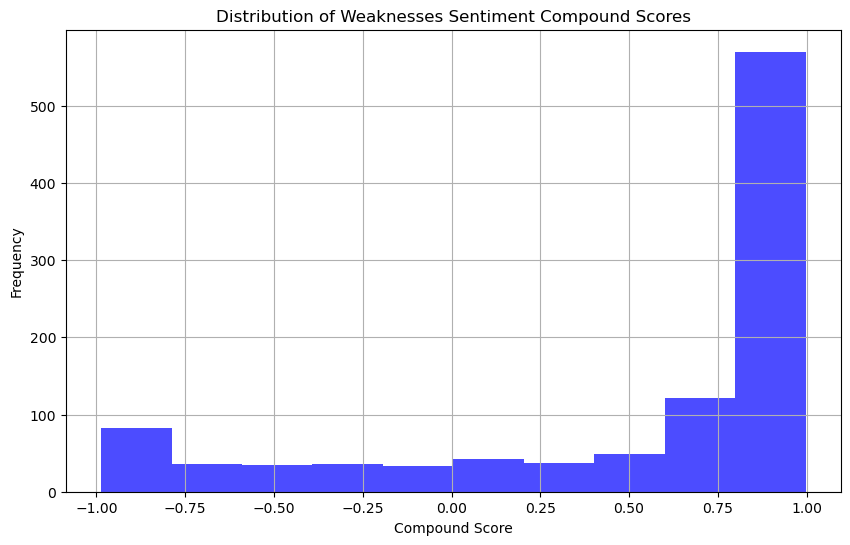

In [4]:
import matplotlib.pyplot as plt

# Filter out rows with NaN values in the compound scores
df_filtered = df.dropna(subset=['Weaknesses_Compound'])

# Create a histogram of the compound scores
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['Weaknesses_Compound'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Distribution of Weaknesses Sentiment Compound Scores')
plt.grid(True)
plt.show()

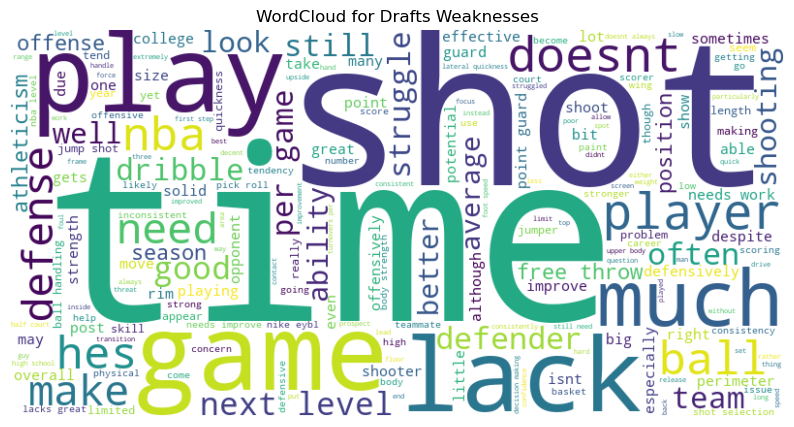

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine strengths and weaknesses text
combined_text = df['Weaknesses_Preprocessed'].str.cat(sep=' ')

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Drafts Weaknesses')
plt.show()


In [6]:
len(df)

1042

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


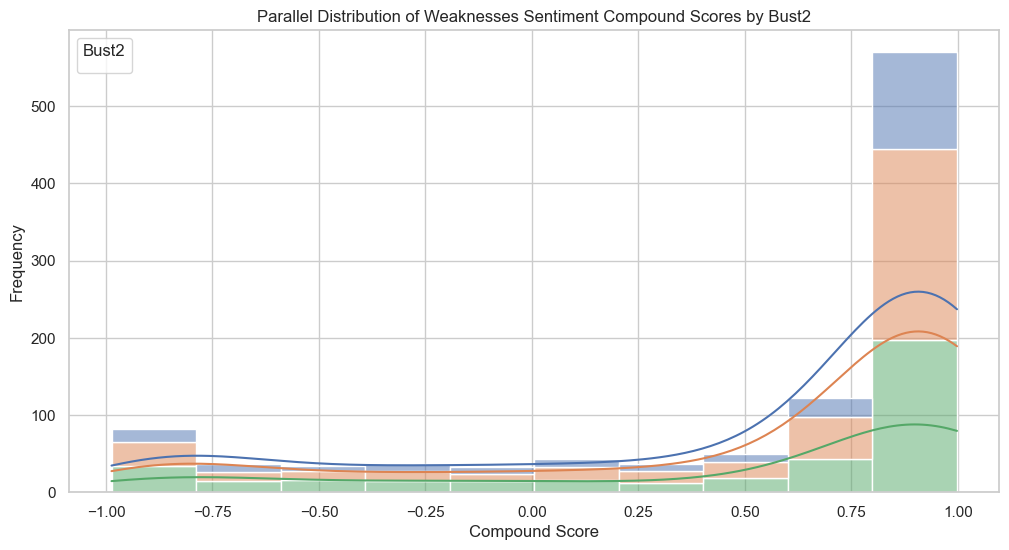

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # Load the CSV file with Weaknesses sentiment scores
# input_csv_path3 = "draft_weaknesses_sentiment_scores.csv"  # Update with your file path

# # Read the CSV into a pandas DataFrame
# df = pd.read_csv(input_csv_path3)

# Drop rows with NaN values in the specified columns
columns_to_check = ['Weaknesses_Preprocessed', 'Weaknesses_Compound']
df = df.dropna(subset=columns_to_check)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a parallel distribution plot of scores and Bust2 players using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Weaknesses_Compound', hue='Bust2', multiple='stack', bins=10, kde=True)
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Parallel Distribution of Weaknesses Sentiment Compound Scores by Bust2')
plt.legend(title='Bust2')
plt.show()


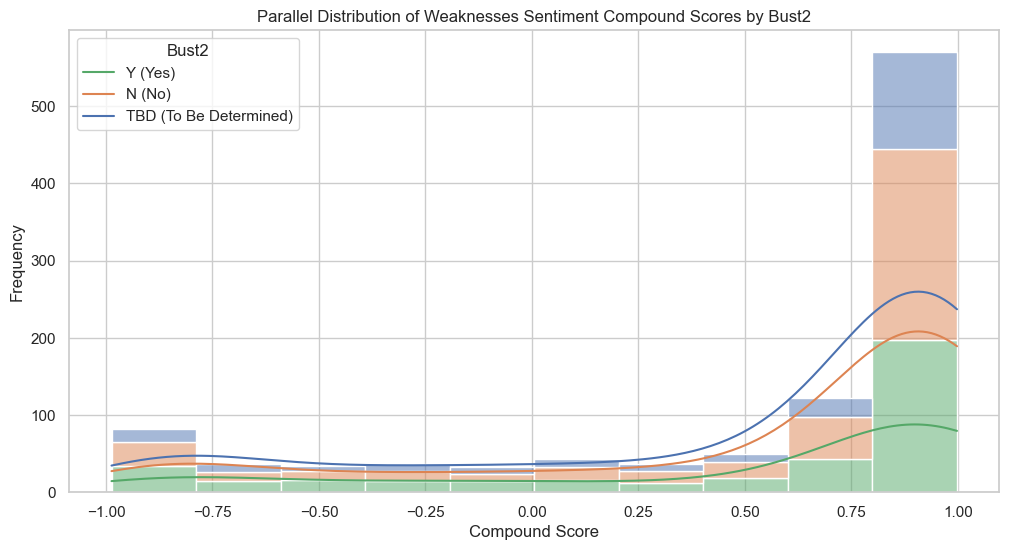

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # Load the CSV file with Weaknesses sentiment scores
# input_csv_path3 = "draft_weaknesses_sentiment_scores.csv"  # Update with your file path

# # Read the CSV into a pandas DataFrame
# df = pd.read_csv(input_csv_path3)

# Drop rows with NaN values in the specified columns
columns_to_check = ['Weaknesses_Preprocessed', 'Weaknesses_Compound']
df = df.dropna(subset=columns_to_check)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a parallel distribution plot of scores and Bust2 players using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Weaknesses_Compound', hue='Bust2', multiple='stack', bins=10, kde=True)
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Parallel Distribution of Weaknesses Sentiment Compound Scores by Bust2')
plt.legend(title='Bust2', labels=['Y (Yes)', 'N (No)', 'TBD (To Be Determined)'])
plt.show()


The blue line you are seeing in the histograms is most likely the Kernel Density Estimate (KDE) curve. KDE is a non-parametric way to estimate the probability density function of a random variable. It is often used in histograms to provide a smoothed representation of the data distribution.

The KDE curve gives you an idea of how the data is distributed along the x-axis (compound score) and provides insights into the underlying shape of the distribution. It helps you identify potential modes, peaks, and variations in the data distribution that might not be apparent in a simple histogram.

So, in the context of your histogram plots, the blue line is the KDE curve that represents the estimated distribution of compound scores for each 'Bust2' category. The bars of the histogram show the actual frequency counts in each bin, while the KDE curve provides a smoothed visual representation of the data's probability density.

C:\Users\sinti\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sinti\AppData\Local\Temp\ipykernel_8532\1179376259.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


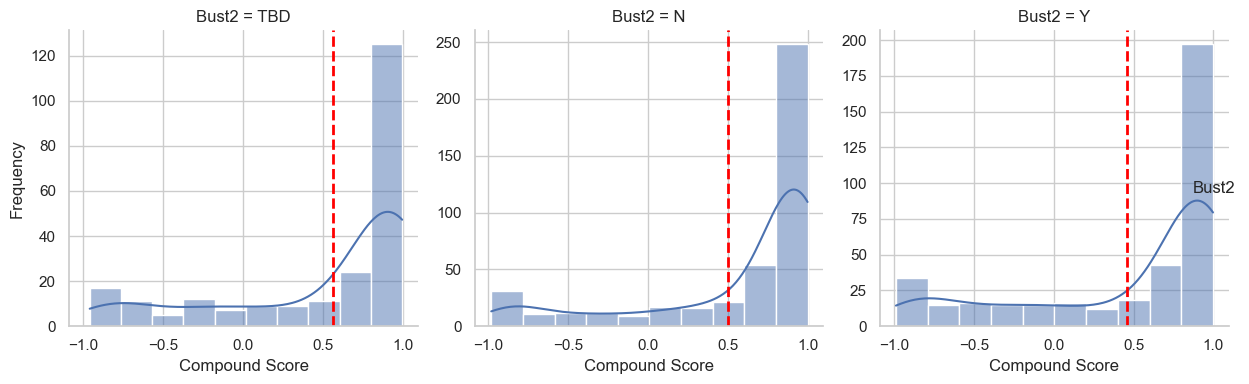

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with NaN values in the specified columns
columns_to_check = ['Weaknesses_Preprocessed', 'Weaknesses_Compound']
df = df.dropna(subset=columns_to_check)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a facet grid of subplots for each 'Bust2' category
g = sns.FacetGrid(df, col='Bust2', col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.histplot, x='Weaknesses_Compound', bins=10, kde=True)
g.set_axis_labels('Compound Score', 'Frequency')
g.set_titles("Bust2 = {col_name}")
g.add_legend(title='Bust2')

# Calculate average scores for each Bust2 category
average_scores = df.groupby('Bust2')['Weaknesses_Compound'].mean()

# Draw average score lines on each subplot
for ax, avg_score in zip(g.axes.flat, average_scores):
    ax.axvline(avg_score, color='red', linestyle='dashed', linewidth=2)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'Weaknesses_Preprocessed' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Weaknesses_Preprocessed'])

# Get the vocabulary (first 30 words)
vocabulary = tfidf_vectorizer.get_feature_names_out()[:30]

# Get the first 10 sample vectorization score columns
sample_scores = tfidf_matrix[:, :10].toarray()

# Print the vocabulary
print("First 30 Vocabulary Words:")
print(vocabulary)

# Print the first 10 sample vectorization score columns
print("\nFirst 10 Sample Vectorization Score Columns:")
print(sample_scores)


First 30 Vocabulary Words:
['aac' 'aahs' 'aaron' 'aau' 'abandoned' 'abilities' 'abilitiesplays'
 'ability' 'abilitydoesnt' 'abilties' 'able' 'abnormal' 'abort'
 'aboveaverage' 'abovetherim' 'absent' 'absolute' 'absolutely' 'absorb'
 'absorbing' 'abundance' 'abuse' 'abused' 'abysmal' 'academic'
 'academically' 'academics' 'academy' 'acb' 'acc']

First 10 Sample Vectorization Score Columns:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.06024411 0.         0.        ]
 [0.         0.         0.         ... 0.0635197  0.         0.        ]
 ...
 [0.         0.         0.         ... 0.02719611 0.         0.        ]
 [0.         0.         0.         ... 0.03215775 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [19]:
import pandas as pd
df = pd.read_csv('draft_sentiment_scores_busts4.csv')
# Get the top 10 most positive scores
top_positive_scores = df.nlargest(10, 'Weaknesses_Preprossed_Compound')

# Get the top 10 most negative scores
top_negative_scores = df.nsmallest(10, 'Weaknesses_Preprossed_Compound')

# Print the top 10 most positive scores with PLAYER_NAME and Bust2 column values
print("Top 10 Most Positive Scores:")
print(top_positive_scores[['PLAYER_NAME', 'Bust2', 'Weaknesses_Preprocessed','Weaknesses_Preprossed_Compound']])

# Print the top 10 most negative scores with PLAYER_NAME and Bust2 column values
print("\nTop 10 Most Negative Scores:")
print(top_negative_scores[['PLAYER_NAME', 'Bust2', 'Weaknesses_Preprocessed','Weaknesses_Preprossed_Compound']])

# Filter out rows with NaN values in the compound scores
df_filtered = df.dropna(subset=['Weaknesses_Preprossed_Compound'])

# Count the number of occurrences for each sentiment category
sentiment_counts = {
    'Positive': sum(df_filtered['Weaknesses_Preprossed_Compound'] > 0.1),
    'Neutral': sum((df_filtered['Weaknesses_Preprossed_Compound'] >= -0.1) & (df_filtered['Weaknesses_Preprossed_Compound'] <= 0.1)),
    'Negative': sum(df_filtered['Weaknesses_Preprossed_Compound'] < -0.1)
}

# Print the distribution of sentiment categories
print("\nSentiment Distribution:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count}")


Top 10 Most Positive Scores:
         PLAYER_NAME Bust2                            Weaknesses_Preprocessed  \
0        Jalen Green   TBD  green good shooter yet sniper beyond arc still...   
1         RJ Barrett     N  may peaked degree high school clearly top kid ...   
2  Marvin Bagley III     Y  lack wingspan big men class continue fill fram...   
3      James Wiseman   TBD  obvious elephant room go draft played minute c...   
4         Kyle Kuzma     N  kuzma show great deal talent skill still need ...   
5     Chase Budinger     N  strong oneonone player area game focus end flo...   
6     Charles Bassey   TBD  need work shooting range consistency hesitates...   
7      Victor Claver     Y  need add strength although he tough doesnt see...   
8       Johnny Davis   TBD  asked goto scorer last season necessity aggres...   
9       Tyrese Maxey   TBD  struggled efficiencyconsistency freshman kentu...   

   Weaknesses_Preprossed_Compound  
0                          0.9979  
1      

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PERSON_ID                       1042 non-null   int64  
 1   PLAYER_NAME                     1042 non-null   object 
 2   SEASON                          1042 non-null   int64  
 3   ROUND_NUMBER                    1042 non-null   int64  
 4   ROUND_PICK                      1042 non-null   int64  
 5   OVERALL_PICK                    1042 non-null   int64  
 6   DRAFT_TYPE                      1042 non-null   object 
 7   TEAM_ID                         1042 non-null   int64  
 8   TEAM_CITY                       1042 non-null   object 
 9   TEAM_NAME                       1042 non-null   object 
 10  TEAM_ABBREVIATION               1042 non-null   object 
 11  ORGANIZATION                    1040 non-null   object 
 12  ORGANIZATION_TYPE               10